In [5]:
# part4-1
# 시각화 도구
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel('./data-4/시도별_전출입_인구수.xlsx')
df.tail()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,NaN,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


In [6]:
df = df.ffill()
df.tail()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501
324,제주특별자치도,제주특별자치도,9290,12427,12210,16158,19580,34221,23291,31028,...,59564,55673,55507,59846,54280,60607,59673,59036,66444,63275


In [20]:
# 서울 -> 다른 지역 
mask = (df['전출지별']=='서울특별시') & ( df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul
# 전출지별 열 삭제하기
df_seoul = df_seoul.drop(['전출지별'], axis=1 )
df_seoul
# 전출지별 --> 전출지 이름 변경
df_seoul = df_seoul.rename( {'전입지별' : '전입지' }, axis=1 )
df_seoul
# 전입지 열을 인덱스로 변경하기 
df_seoul=df_seoul.set_index( '전입지' )
df_seoul
# 각 열에 대한 원소형태를 보기
df_seoul.info()
df_seoul

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 전국 to 제주특별자치도
Data columns (total 48 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1970    17 non-null     object
 1   1971    17 non-null     object
 2   1972    17 non-null     object
 3   1973    17 non-null     object
 4   1974    17 non-null     object
 5   1975    17 non-null     object
 6   1976    17 non-null     object
 7   1977    17 non-null     object
 8   1978    17 non-null     object
 9   1979    17 non-null     object
 10  1980    17 non-null     object
 11  1981    17 non-null     object
 12  1982    17 non-null     object
 13  1983    17 non-null     object
 14  1984    17 non-null     object
 15  1985    17 non-null     object
 16  1986    17 non-null     object
 17  1987    17 non-null     object
 18  1988    17 non-null     object
 19  1989    17 non-null     object
 20  1990    17 non-null     object
 21  1991    17 non-null     object
 22  1992    17 non-null     obj

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object
<class 'pandas.core.series.Series'>
Index: 48 entries, 1970 to 2017
Series name: 경기도
Non-Null Count  Dtype 
--------------  ----- 
48 non-null     object
dtypes: object(1)
memory usage: 1.8+ KB


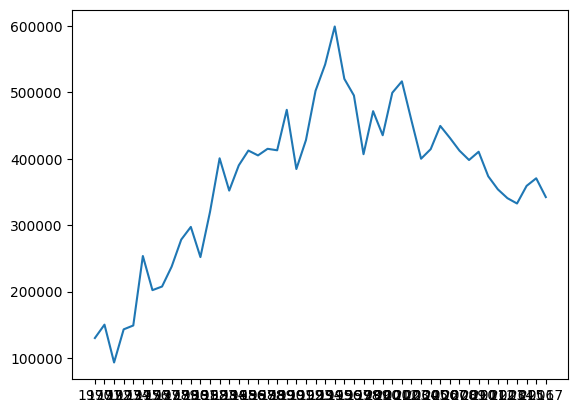

In [51]:
# 서울 -> 경기도
sr_one = df_seoul.loc[ '경기도' ]
print(sr_one.head())
sr_one.index
# sr_one = sr_one.astype(int)
sr_one.info()
# 아래 3개가 모두 같은 명령 - 시리즈 일때 
# sr_one.plot( kind='line' ) 
# plt.plot(  sr_one.index, sr_one.values ) 
plt.plot( sr_one )

C:\Users\606-TC\anaconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\606-TC\anaconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\606-TC\anaconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\606-TC\anaconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\606-TC\anaconda3\envs\ai\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(

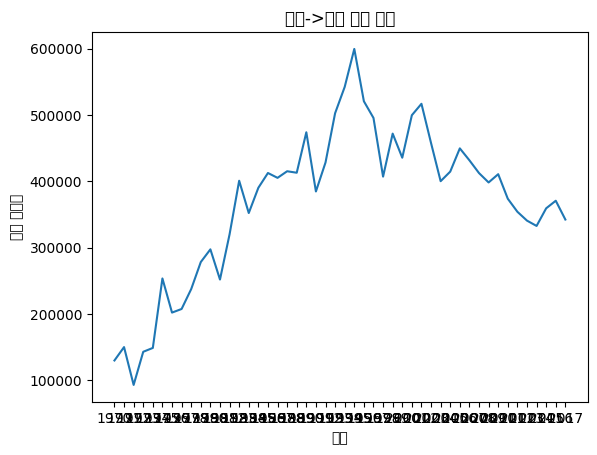

In [58]:
plt.plot( sr_one, linestyle='-') 
plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

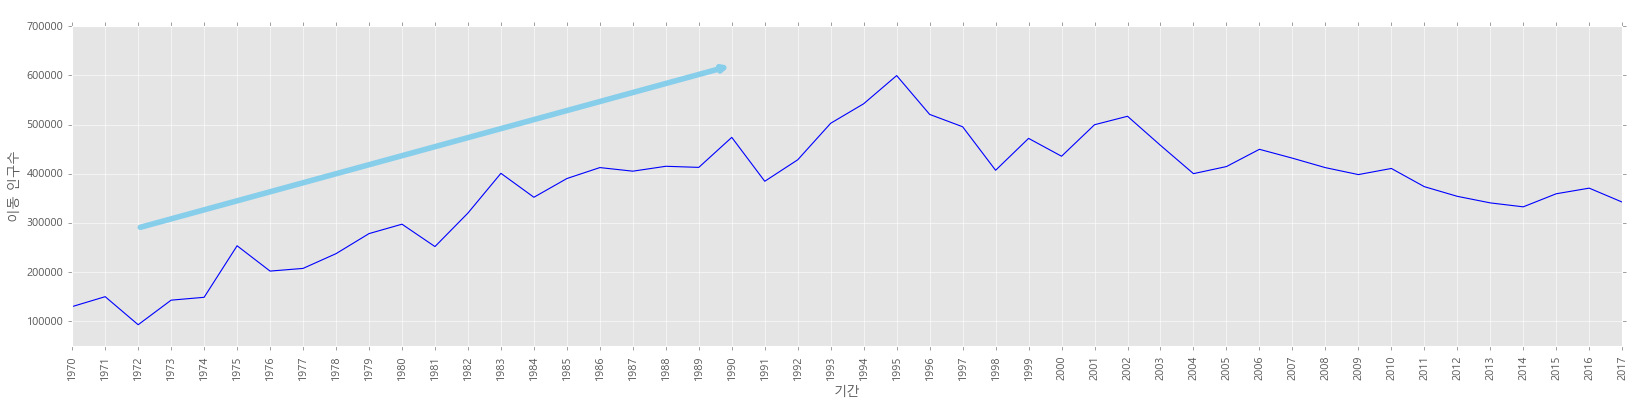

In [136]:
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot')
plt.figure( figsize=(25, 5) )  # 단위 인치
plt.xticks( size=10, rotation='vertical') # 포인트 1pt = 1/72인치 = 0.33mm
plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.ylim( 50000, 700000) # y축 값을 고정값을 할 때 이용
plt.plot( sr_one, linestyle='-', color='blue') # 선색깔 바꾸기 color='색' 
plt.annotate('', xy=( 20,620000), xytext=(2, 290000), xycoords='data', arrowprops=dict(arrowstyle='->', color='skyblue', lw=5), )
plt.show()

In [64]:
# 제주특별자치도에서 서울특별시로 전입한 이동 그래프 그리기
df=pd.read_excel('./data-4/시도별_전출입_인구수.xlsx')
df=df.ffill()

mask = (df['전출지별'] == '제주특별자치도') & (df['전입지별'] == '서울특별시')
df_seoul=df[mask]
df_seoul

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
308,제주특별자치도,서울특별시,3881,4885,2339,7411,8470,14272,9900,10103,...,6100,5955,5632,5268,5612,5410,5739,6351,6634,7209


In [82]:
# 제주특별자치도에서 서울특별시로 전입한 이동 그래프 2022년~2024년을 기준으로 그래프 그리기
# 통계청에서 다운 받아서
# 177쪽 실행 결과처럼 나오게 해보기
df=pd.read_excel('./data-4/전출지_전입지_제주_서울.xlsx')
df.head()

C:\Users\606-TC\anaconda3\envs\ai\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,전출지별,전입지별,이동규모별,2025.03,2022,2023,2024
0,전국,전국,계,410582,4412470,4364486,4487846
1,전국,서울특별시,계,84466,888184,881333,893566
2,전국,부산광역시,계,23707,276635,264633,272669
3,전국,대구광역시,계,16450,185987,200235,206163
4,전국,인천광역시,계,25387,267015,280536,273358


In [93]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

C:\Users\606-TC\anaconda3\envs\ai\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


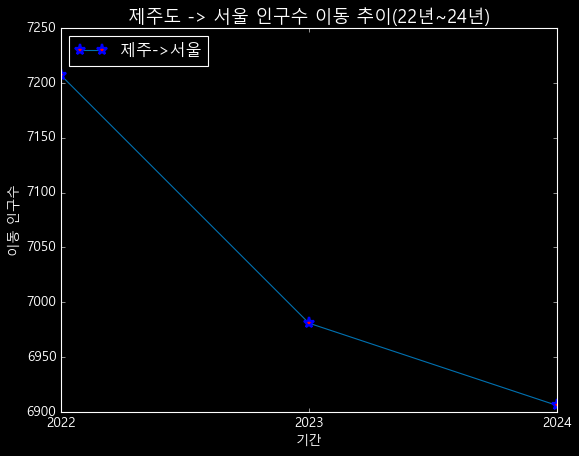

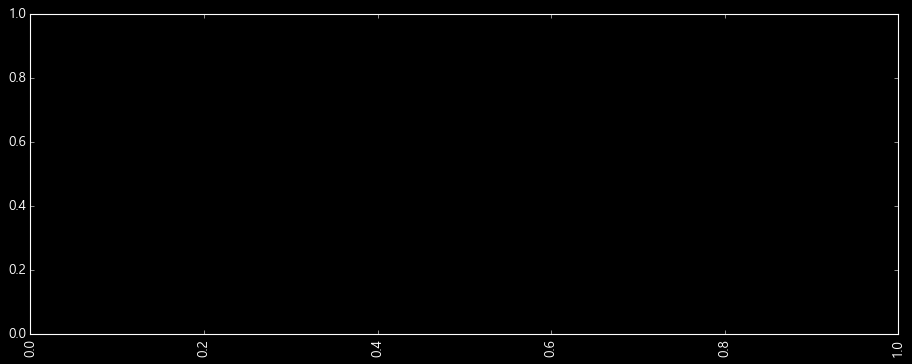

In [107]:
df=pd.read_excel('./data-4/전출지_전입지_제주_서울.xlsx')
df.head()
mask= (df['전출지별'] == '제주특별자치도') & (df['전입지별'] == '서울특별시' )
df = df[mask]
df = df.drop(['전출지별'], axis=1)
sr_data = df.iloc[0, [3, 4, 5]]
sr_data
plt.style.use('seaborn-v0_8-colorblind') # print(plt.style.avaiable) 인쇄해 보면 '스타일명' 확인할 수 있다.
plt.plot(sr_data, marker='o', markerfacecolor='red',
         markeredgecolor='blue', markeredgewidth=2, markersize=10)
plt.title('제주도 -> 서울 인구수 이동 추이(22년~24년)', size=16)
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.legend(labels=['제주->서울'], loc='upper left')
plt.figure(figsize=(14, 5))
plt.xticks(rotation='vertical')
plt.show()

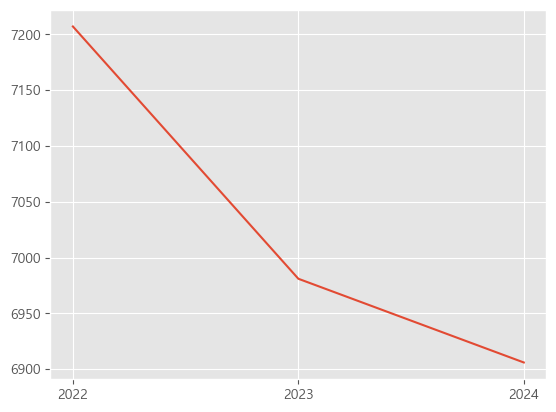

In [91]:
# mask= (df['전출지별']=='제주특별자치도') & (df['전입지별'] == '서울특별시' )
# df = df[mask]
# df
# df=df.drop(['전출지별'], axis=1)
# df
sr_data=df.iloc[ 0, [3,4,5] ]
sr_data
plt.plot( sr_data )

In [2]:
# 교재 165page
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_excel('./data-4/시도별_전출입_인구수.xlsx')
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [3]:
df=df.ffill()
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [15]:
mask = ( df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별': '전입지'}, axis=1, inplace=True) #교재에 17줄 고치세요
df_seoul = df_seoul.set_index('전입지') #교재에서 18줄 고치기
df_seoul

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813
경기도,130149,150313,93333,143234,149045,253705,202276,207722,237684,278411,...,412408,398282,410735,373771,354135,340801,332785,359337,370760,342433


In [16]:
sr_one = df_seoul.loc['경기도']
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

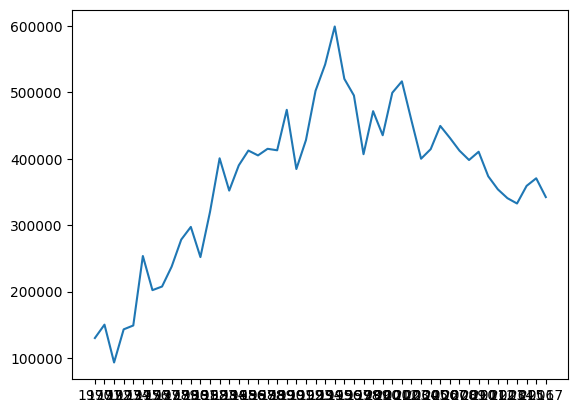

In [17]:
plt.plot( sr_one.index, sr_one.values )
plt.show()

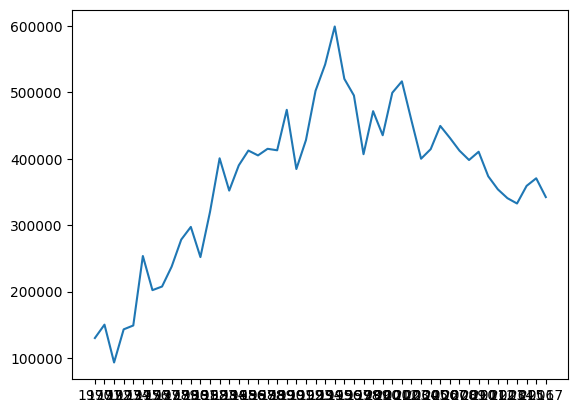

In [18]:
# 169 
plt.plot( sr_one ) # 해당 값을 y축값을 지정
plt.show()

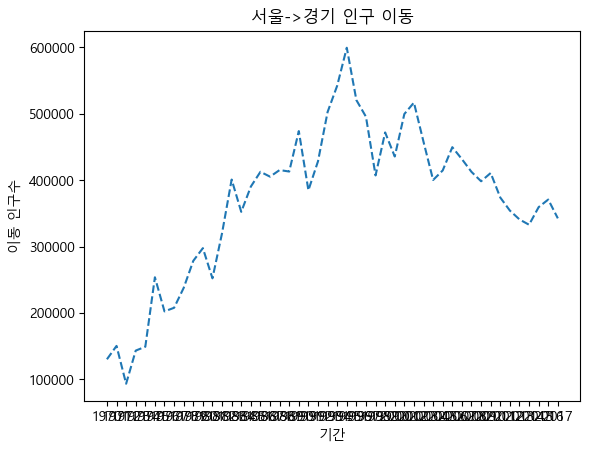

In [20]:
# 170
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.plot( sr_one.index, sr_one.values, linestyle='--')
plt.title('서울->경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

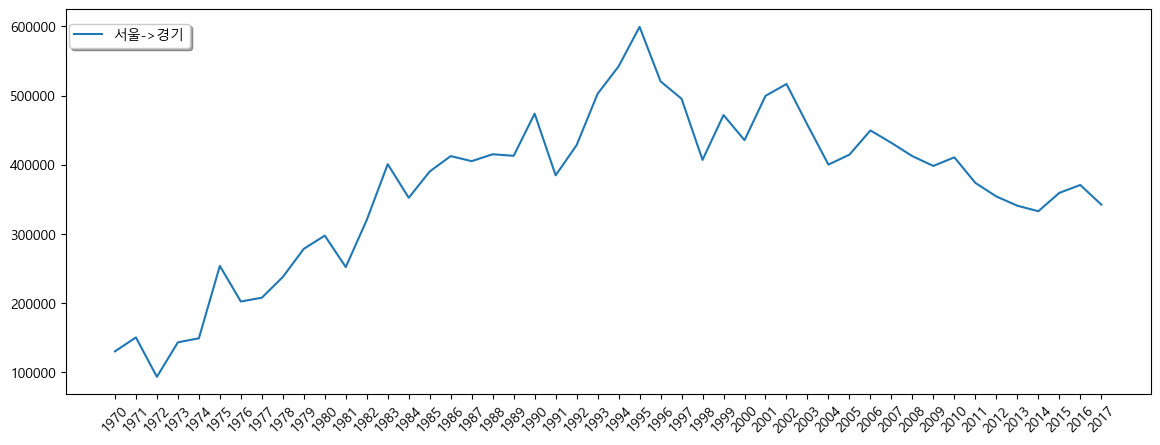

In [39]:
# 173 예제 4-4
sr_one = df_seoul.loc['경기도']
plt.figure( figsize=(14, 5) ) # 가로-14인치, 세로-5인차
plt.plot( sr_one , label='서울->경기' )
plt.xticks(rotation=45)
plt.yticks(rotation='horizontal')
#plt.legend(loc='upper left') # 범례나오게 하기 
plt.legend( loc=(0.003, 0.9), frameon=True, shadow = True )
plt.show()

In [48]:
# 178page에 있는 코드 수정하세요
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [78]:
plt.style.use('default') # 해당 스타일로 적용하기 
plt.show()

In [79]:
# 181page
import pandas as pd
import matplotlib.pyplot as plt

samsung_revenue = pd.read_csv('./data-4/삼성전자_분기별_매출액.csv')
samsung_revenue = samsung_revenue.sort_values( 'quarter' ) #오름차순 정렬
samsung_revenue

,value,quarter
5,77203607000000,2022-Q2
4,76781680000000,2022-Q3
3,70464575000000,2022-Q4
2,63745371000000,2023-Q1
1,60005533000000,2023-Q2
0,67404652000000,2023-Q3


In [80]:
fig=plt.figure()
fig

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


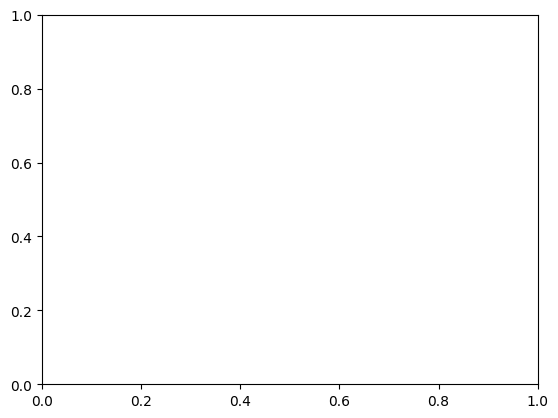

In [81]:
fig, axe = plt.subplots()
print(fig)
print(axe)

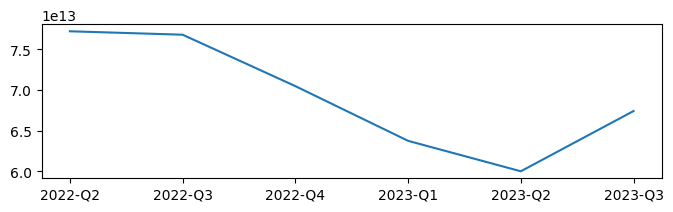

In [82]:
fig, axe = plt.subplots(figsize=(8,2))
axe.plot( samsung_revenue['quarter'], samsung_revenue['value'] )
plt.show()

Figure(640x480)
[[<Axes: > <Axes: > <Axes: >]
 [<Axes: > <Axes: > <Axes: >]]


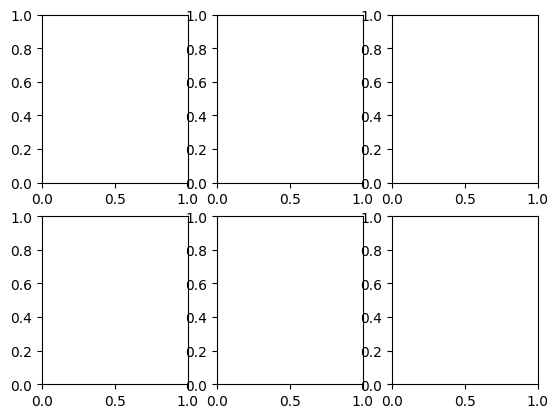

In [85]:
fig, axes = plt.subplots(2, 3)
print(fig)
print(axes)

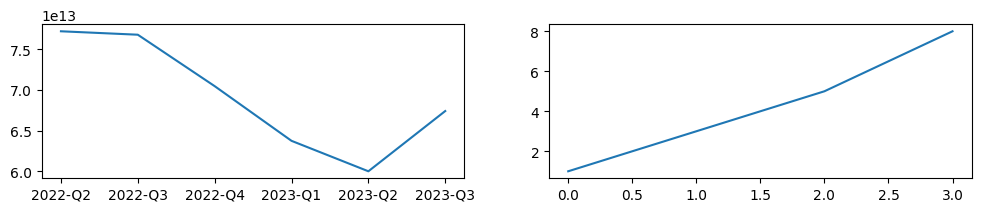

In [93]:
# 교재 186쪽 예제 4-8 24행
fig, axes = plt.subplots( 1,2, figsize=(12,2))
axes[0].plot( samsung_revenue['quarter'], samsung_revenue['value'] )
# axes[1].plot( [1,4,8,15,9] )
#samsung_revenue['value'].plot( ax=axes[1] ) # 판다스 명령 챠트그리는 것 
#plt.show()
#samsung_revenue['value'].plot( ax=axes[0]) # 시리즈데이터.plot( ax=축번호 )
s = [1,3,5,8]
ser = pd.Series(s)
ser.plot( ax = axes[1] )
plt.show()



In [ ]:
# 